In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 94% 153M/163M [00:01<00:00, 144MB/s]
100% 163M/163M [00:01<00:00, 142MB/s]


In [ ]:
from zipfile import ZipFile
data  = '/content/face-mask-dataset.zip'

with ZipFile(data, 'r') as zip:
  zip.extractall()
  print('done')

done


In [4]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [5]:
# Importing the Dependencies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [6]:
with_mask_files =os.listdir('/content/data/with_mask')
without_mask_files =os.listdir('/content/data/without_mask')

In [7]:
# print first 5 in with_mask
print(with_mask_files[0:5])

['with_mask_486.jpg', 'with_mask_1291.jpg', 'with_mask_2698.jpg', 'with_mask_51.jpg', 'with_mask_3652.jpg']


In [9]:
# print the last 5 without_mask
print(without_mask_files[-5:])

['without_mask_3268.jpg', 'without_mask_3178.jpg', 'without_mask_259.jpg', 'without_mask_2642.jpg', 'without_mask_3087.jpg']


In [12]:
print(f'number of images with mask{len(with_mask_files)}')
print(f'number of images without mask{len(without_mask_files)}')


number of images with mask3725
number of images without mask3828


In [13]:
# Creating the label for the two class in the image
# if the person is wearing the mask then the label should be 1 viceversa
with_mask_label = [1]*3725
without_mask_label = [0]*3828

In [14]:
print( with_mask_label[0:5])
print(without_mask_label[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [15]:
print(len(with_mask_label))
print(len(without_mask_label))

3725
3828


In [17]:
labels = with_mask_label + without_mask_label

In [18]:
print(len(labels))

7553


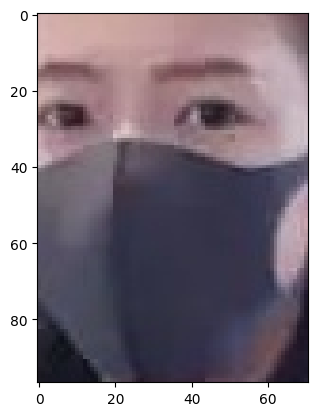

In [19]:
# Display the images using matplotlib
# display 1 with mask and 1 without mask
img = mpimg.imread('/content/data/with_mask/with_mask_486.jpg')
imgplot = plt.imshow(img)
plt.show()


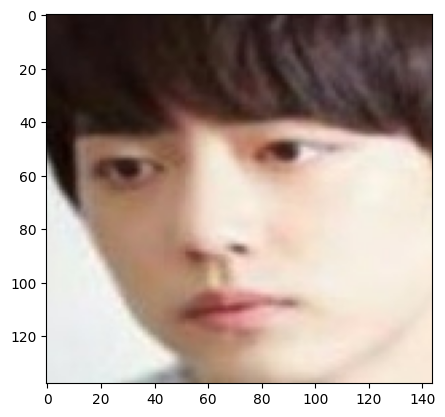

In [20]:
img = mpimg.imread('/content/data/without_mask/without_mask_3268.jpg')
imgplot = plt.imshow(img)
plt.show()

In [23]:
# Image processing  steps are -
# resize the images
# convert the images into numpy arrays

with_mask_path ='/content/data/with_mask/'
data =[]

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)






  without_mask_path ='/content/data/without_mask/'

for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [24]:
type(data)

list

In [25]:
len(data)

7553

array([[[207, 173, 172],
        [208, 174, 173],
        [211, 177, 176],
        ...,
        [109,  79,  87],
        [105,  77,  86],
        [103,  76,  85]],

       [[208, 174, 173],
        [209, 175, 174],
        [212, 178, 177],
        ...,
        [107,  79,  86],
        [104,  77,  85],
        [103,  76,  85]],

       [[210, 176, 175],
        [211, 177, 176],
        [212, 178, 177],
        ...,
        [106,  80,  87],
        [104,  77,  86],
        [103,  76,  85]],

       ...,

       [[ 26,  23,  32],
        [ 25,  23,  31],
        [ 23,  22,  30],
        ...,
        [ 29,  25,  42],
        [ 29,  26,  43],
        [ 28,  25,  42]],

       [[ 26,  24,  32],
        [ 25,  24,  32],
        [ 24,  23,  31],
        ...,
        [ 30,  27,  44],
        [ 32,  29,  46],
        [ 32,  29,  46]],

       [[ 26,  25,  33],
        [ 26,  25,  33],
        [ 25,  24,  32],
        ...,
        [ 31,  28,  45],
        [ 35,  32,  49],
        [ 36,  33,  50]]], dtype=uint8)
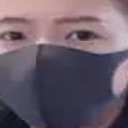

In [26]:
data[0]

In [27]:
type(data[0])

numpy.ndarray

In [28]:
data[0].shape

(128, 128, 3)

In [29]:
# i want to convert the  label(dtype list into numpy array)
x = np.array(data)
y = np.array(labels)

In [30]:
type(x)

numpy.ndarray

In [31]:
type(y)

numpy.ndarray

In [32]:
print(x.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


In [33]:
# in above the 7553 is the total number of images  , then the 128, 128 is the size and 3 is the number of color channels


In [34]:
# next is the split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [35]:
print(x.shape , x_train.shape ,x_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [36]:
# scaling the  image data
x_train_scaled = x_train/255
x_test_scaled = x_test/25

In [37]:
# Building a Convolutional Neural Network

import tensorflow as tf
from tensorflow import keras


In [38]:
num_of_classes =2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32 , kernel_size = (3,3) , activation = 'relu' , input_shape =(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64 , kernel_size = (3,3) , activation = 'relu' ))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128 , activation ='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes , activation ='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
#  Compile the Neural Network

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy' ,
              metrics =['acc']
              )

In [40]:
# training the neural network

history = model.fit(x_train_scaled , y_train , validation_split =0.1 , epochs =5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 16s 54ms/step - acc: 0.7438 - loss: 0.7272 - val_acc: 0.9025 - val_loss: 0.2737
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - acc: 0.8969 - loss: 0.2552 - val_acc: 0.9107 - val_loss: 0.2420
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - acc: 0.9253 - loss: 0.1809 - val_acc: 0.9190 - val_loss: 0.2300
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9489 - loss: 0.1452 - val_acc: 0.9306 - val_loss: 0.2122
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.9497 - loss: 0.1209 - val_acc: 0.9273 - val_loss: 0.2584


In [43]:
# Model evaluation on our test data
loss , accuracy = model.evaluate(x_test_scaled , y_test)
print(f'Test Accuracy :{accuracy}')

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - acc: 0.9256 - loss: 1.6820
Test Accuracy :0.9166114926338196


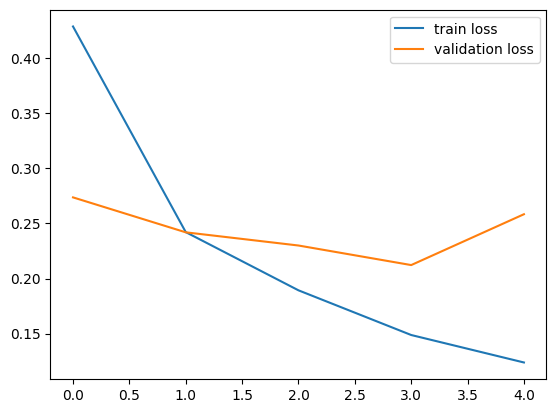

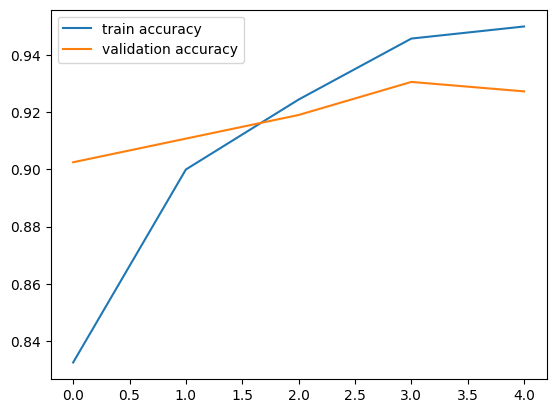

In [45]:
 h = history


# plot the loss value

plt.plot(h.history['loss'] , label = 'train loss')
plt.plot(h.history['val_loss'] , label = 'validation loss')
plt.legend()
plt.show()




plt.plot(h.history['acc'] , label = 'train accuracy')
plt.plot(h.history['val_acc'] , label = 'validation accuracy')
plt.legend()
plt.show()

path of the image to be predicted : /content/how-to-wear-face-mask-right-way.jpg


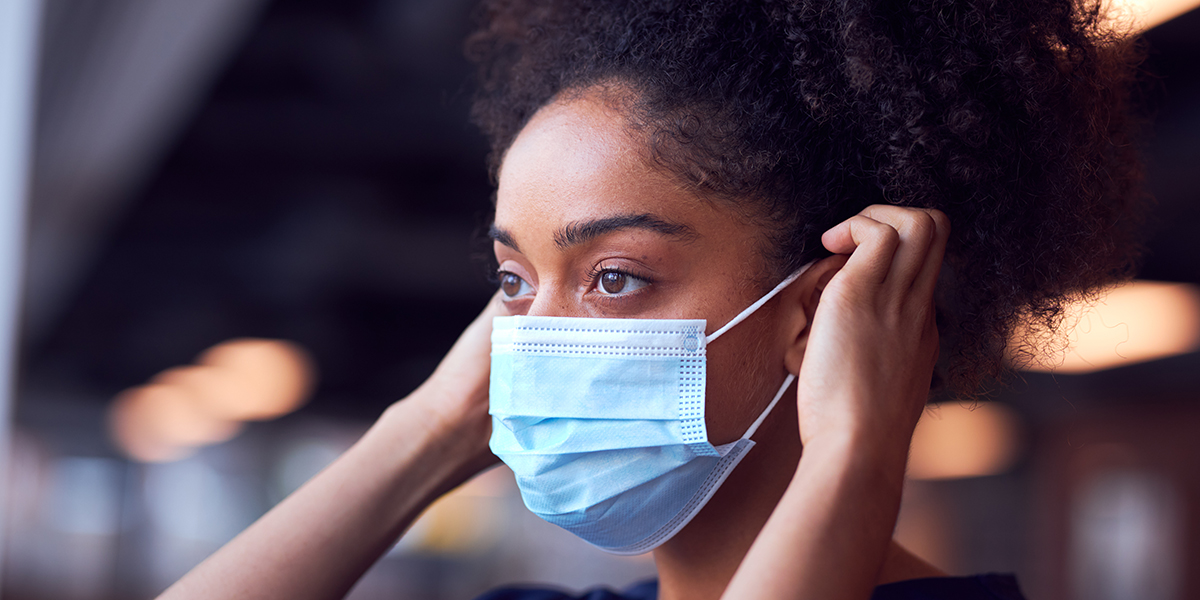

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 728ms/step
[[0.00821826 0.8690936 ]]
1
The Person is wearing a mask


In [49]:
# Predictive System

input_image_path = input('path of the image to be predicted : ')
input_image = cv2.imread(input_image_path) # Added the argument input_image_path

# Use cv2_imshow from google.colab.patches instead of cv2.imshow
from google.colab.patches import cv2_imshow
cv2_imshow(input_image) # Added a title to the image

input_image_resized =cv2.resize(input_image , (128 ,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled,(1,128,128,3)) # Changed the argument to input_image_scaled
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label ==1 :
   print('The Person is wearing a mask')
else:
  print('The person is not wearing the mask ')